1) TESTING DIFFERENT MODELS TO PREDICT INDEX PERFORMANCE

 i. LSTM
 ii. ARIMA
 iii. RANDOM FOREST
 iv. BROWNIAN MOTION

2) PROPOSALS OF INVESTMENTS PORTFOLIOS

 i. Markowitz’s Minimum-Variance Portfolio (MVP)
 ii. Traditional risk parity’s Inverse-Variance Portfolio (IVP)
 iii. Hierarchical Risk Parity (HRP)

In [1]:
#Defining libraries and dependencies
import warnings
import itertools
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import quandl 
import datetime
from datetime import date
import pandas_datareader.data as web
from pandas_datareader import data as pdr

from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
quandl.ApiConfig.api_key = "qrtyy6k9BVDXhBK7AYo4"

%matplotlib inline

import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM, SimpleRNN
from keras.callbacks import EarlyStopping
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.optimizers import SGD



import scipy.cluster.hierarchy as sch
from datetime import date
from matplotlib import pyplot as plt
import cvxopt as opt
from cvxopt import blas, solvers
from alpha_vantage.timeseries import TimeSeries
import ffn
import config
plt.style.use('fivethirtyeight')

Using TensorFlow backend.


In [2]:
#Getting Data

todays_day = date.today() 
start = datetime.datetime(2010, 1, 1)
end = todays_day

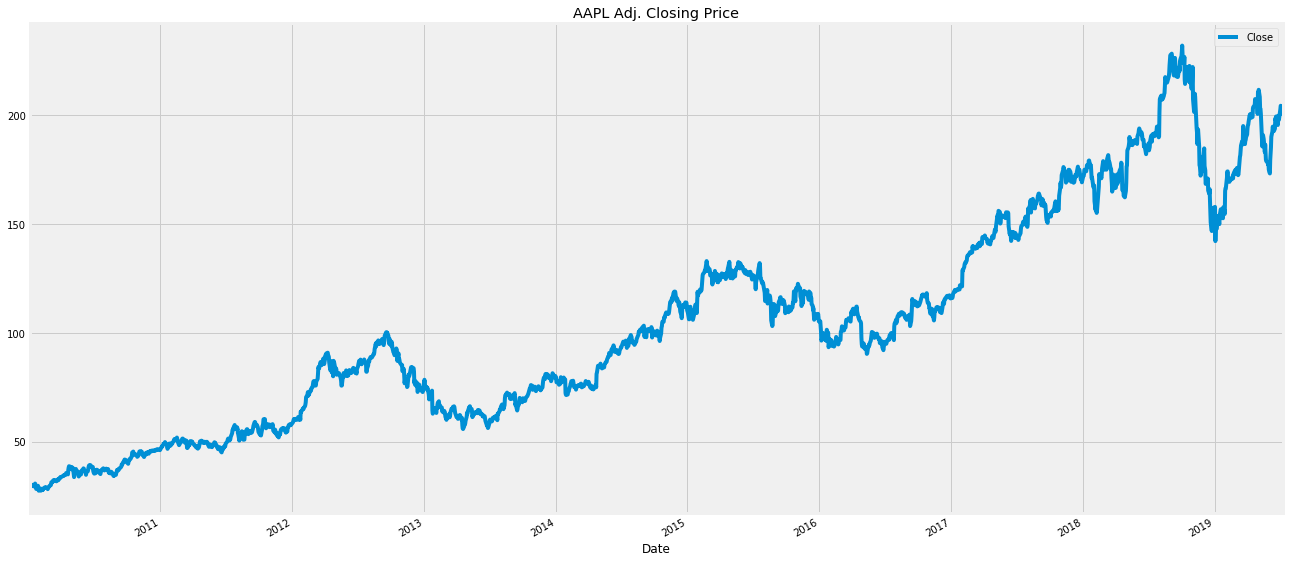

In [3]:
apple = pdr.get_data_yahoo("AAPL", start=start, end=end)['Close']
df_apple=pd.DataFrame(apple)
df_apple.plot(title='AAPL Adj. Closing Price',figsize=(20,10))

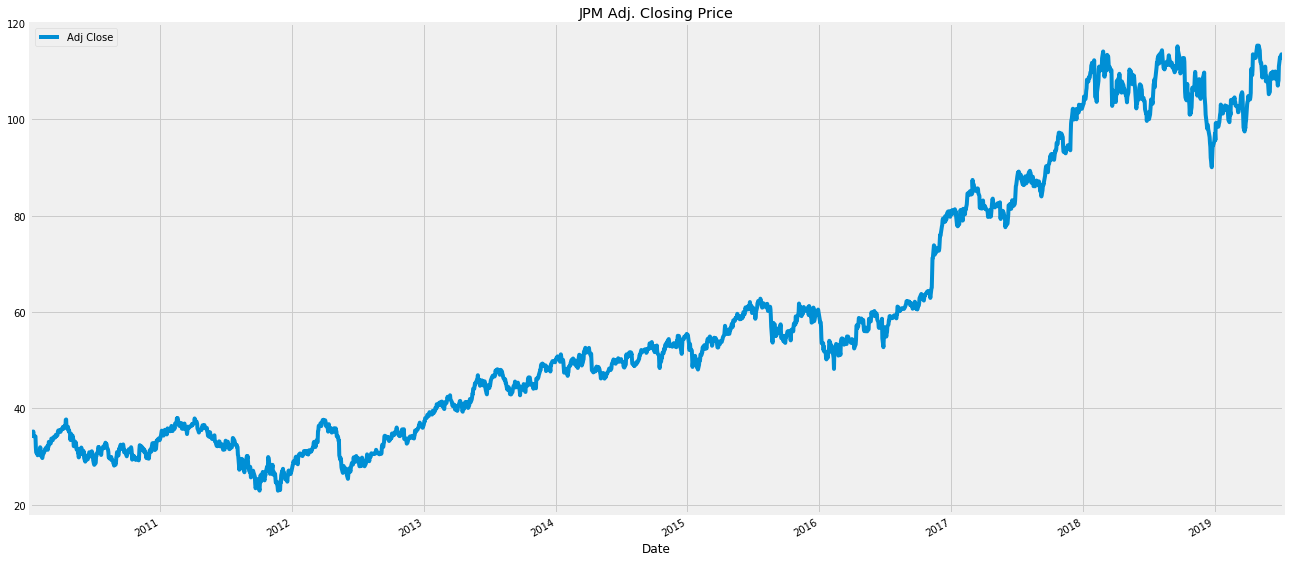

In [4]:
jpm= pdr.get_data_yahoo("JPM", start=start, end=end)['Adj Close']
df_jpm=pd.DataFrame(jpm)
df_jpm.plot(title='JPM Adj. Closing Price',figsize=(20,10))
plt.savefig("images/JPM_actual.png")

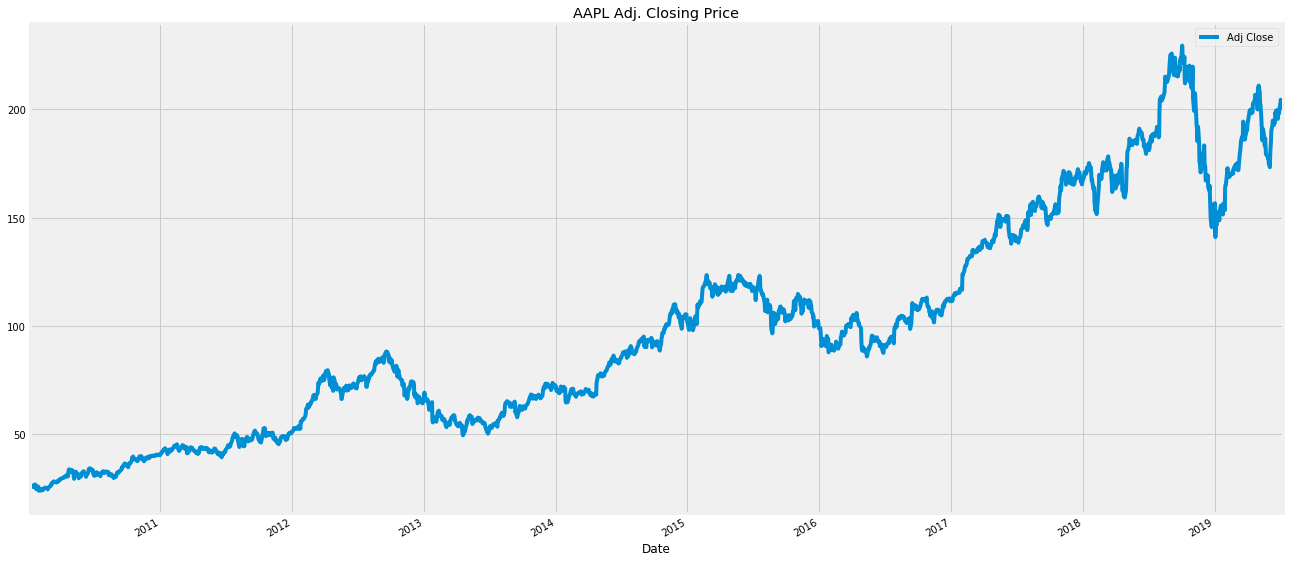

In [5]:
apple = pdr.get_data_yahoo("AAPL", start=start, end=end)['Adj Close']
df_apple=pd.DataFrame(apple)
df_apple.plot(title='AAPL Adj. Closing Price',figsize=(20,10))
plt.savefig("images/APPL_actual.png")

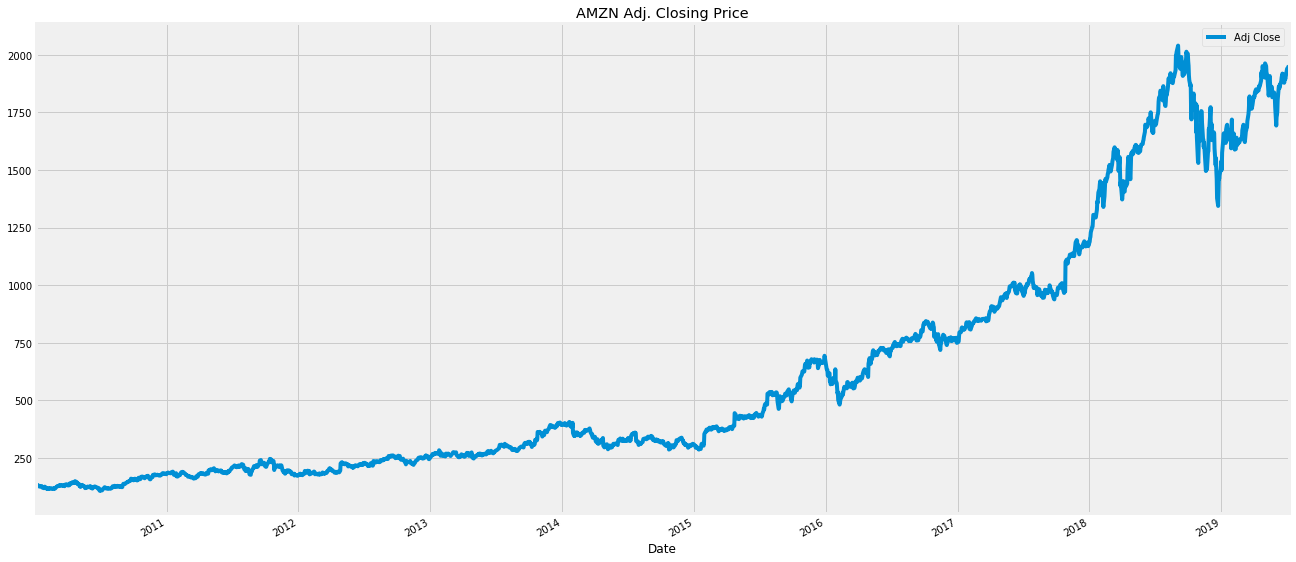

In [6]:
amazon = pdr.get_data_yahoo("AMZN", start=start, end=end)['Adj Close']
df_amazon=pd.DataFrame(amazon)
df_amazon.plot(title='AMZN Adj. Closing Price',figsize=(20,10))
plt.savefig("images/AMZN_actual.png")

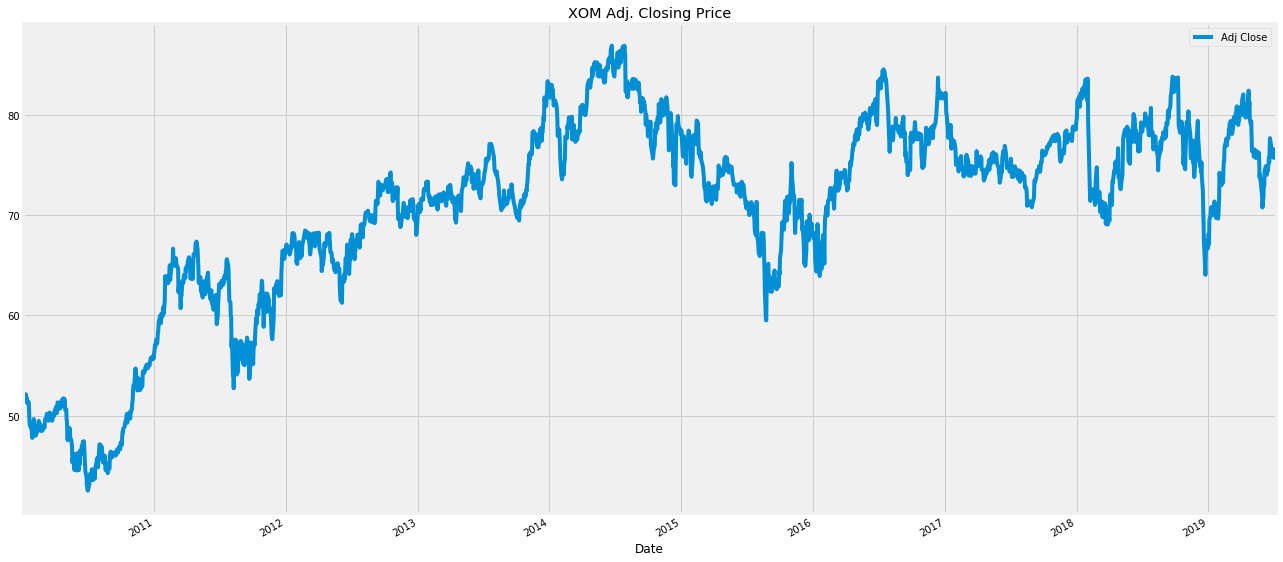

In [7]:
exxon = pdr.get_data_yahoo("XOM", start=start, end=end)['Adj Close']
df_exxon=pd.DataFrame(exxon)
df_exxon.plot(title='XOM Adj. Closing Price',figsize=(20,10))
plt.savefig("images/XOM_actual.png")

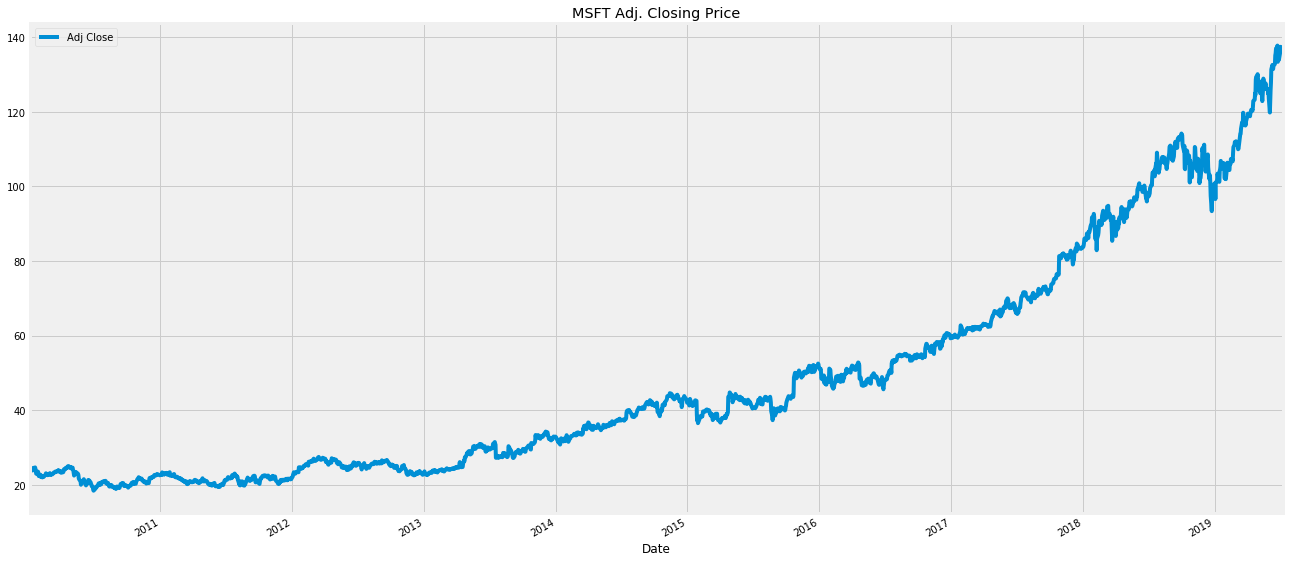

In [8]:
microsoft = pdr.get_data_yahoo("MSFT", start=start, end=end)['Adj Close']
df_microsoft=pd.DataFrame(microsoft)
df_microsoft.plot(title='MSFT Adj. Closing Price',figsize=(20,10))
plt.savefig("images/MSFT_actual.png")

,Close
Date,
2010-10-01,38.81
2010-10-04,38.95
2010-10-05,39.64
2010-10-06,39.90
2010-10-07,39.52


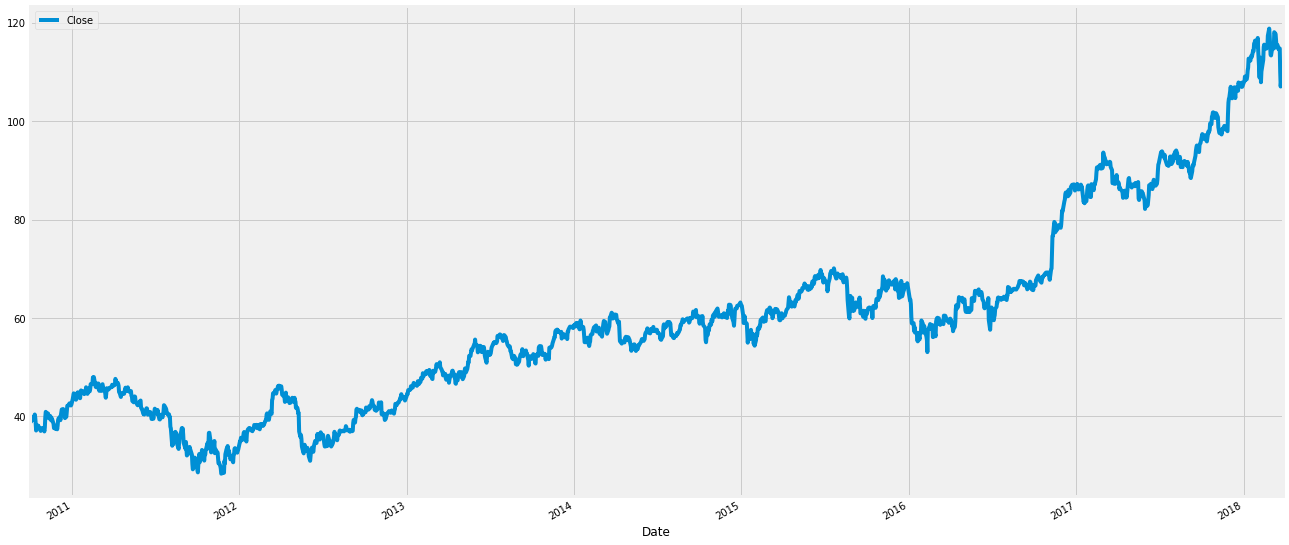

In [ ]:
#Getting Data

start = "2010-10-01"
end = "2018-06-30"

df = quandl.get("WIKI/JPM.4",start_date=start, end_date=end)
df.plot(figsize=(20,10))
plt.savefig("JPM_actual.png")
df.head()

i. TimeSeriesPrediction_LSTM

In [ ]:
dataset = df

In [ ]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [ ]:
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
#print(len(train), len(test))

In [ ]:
# convert an array of values into a dataset matrix
# Give X look_back time what will tomorrows prediction be?
def create_dataset(dataset, look_back=8):
    X, Y = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        X.append(a)
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)

In [ ]:
# reshape into X=t and Y=t+1
import numpy as np
look_back = 10
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))

In [ ]:
sgd = SGD(lr=0.1)
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(1, input_shape=(look_back, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer=sgd)

W0708 21:43:04.298697 4611139008 deprecation_wrapper.py:119] From /Users/aottoni/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0708 21:43:04.299949 4611139008 deprecation_wrapper.py:119] From /Users/aottoni/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0708 21:43:04.301763 4611139008 deprecation_wrapper.py:119] From /Users/aottoni/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0708 21:43:04.447232 4611139008 deprecation_wrapper.py:119] From /Users/aottoni/anaconda3/lib/python3.7/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



In [ ]:
model.fit(trainX, trainY, epochs=50, batch_size=1, verbose=2, callbacks=[EarlyStopping(monitor='loss', patience=20)])

W0708 21:43:04.685431 4611139008 deprecation.py:323] From /Users/aottoni/anaconda3/lib/python3.7/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0708 21:43:05.028887 4611139008 deprecation_wrapper.py:119] From /Users/aottoni/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.

W0708 21:43:05.044068 4611139008 deprecation_wrapper.py:119] From /Users/aottoni/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:973: The name tf.assign is deprecated. Please use tf.compat.v1.assign instead.



Epoch 1/50
 - 9s - loss: 0.0015
Epoch 2/50
 - 8s - loss: 2.0927e-04
Epoch 3/50
 - 7s - loss: 2.0321e-04
Epoch 4/50
 - 7s - loss: 1.9741e-04
Epoch 5/50
 - 7s - loss: 1.9994e-04
Epoch 6/50
 - 7s - loss: 1.9695e-04
Epoch 7/50
 - 7s - loss: 1.8903e-04
Epoch 8/50
 - 7s - loss: 1.8281e-04
Epoch 9/50
 - 7s - loss: 1.9034e-04
Epoch 10/50
 - 7s - loss: 1.8222e-04
Epoch 11/50
 - 7s - loss: 1.8433e-04
Epoch 12/50
 - 7s - loss: 1.8040e-04
Epoch 13/50
 - 7s - loss: 1.8118e-04
Epoch 14/50
 - 7s - loss: 1.7665e-04
Epoch 15/50
 - 7s - loss: 1.7295e-04
Epoch 16/50
 - 7s - loss: 1.7601e-04
Epoch 17/50
 - 9s - loss: 1.7025e-04
Epoch 18/50
 - 7s - loss: 1.6840e-04
Epoch 19/50
 - 7s - loss: 1.6959e-04
Epoch 20/50
 - 7s - loss: 1.6665e-04
Epoch 21/50
 - 7s - loss: 1.6153e-04
Epoch 22/50
 - 7s - loss: 1.5699e-04
Epoch 23/50
 - 7s - loss: 1.5840e-04
Epoch 24/50
 - 7s - loss: 1.6015e-04
Epoch 25/50
 - 7s - loss: 1.5824e-04
Epoch 26/50
 - 7s - loss: 1.5578e-04
Epoch 27/50
 - 7s - loss: 1.5346e-04
Epoch 28/50


In [ ]:
model.save("jpm_ohlc.h5")

In [ ]:
from keras.models import load_model
model = load_model("jpm_ohlc.h5")

In [ ]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

In [ ]:
fake_10 = [[100,101,110,105,100,101,110,105,120,130]]
processed_fake_10 = scaler.transform(fake_10)
processed_fake_10.reshape(1,10,1)
output = model.predict(processed_fake_10.reshape(1,10,1))
scaler.inverse_transform(output)

In [ ]:
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

In [ ]:
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

In [ ]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

ii. Autoregressive integrated moving average (ARIMA)

In [ ]:
# The 'MS' string groups the data in buckets by start of the month
y=df
y = y['Close'].resample('MS').mean()

# The term bfill means that we use the value before filling in missing values
y = y.fillna(y.bfill())

In [ ]:
#Parameter Selection for the ARIMA Time Series Model


# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

In [ ]:
warnings.filterwarnings("ignore") # specify to ignore warning messages

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=True)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

In [ ]:
#Fitting an ARIMA Time Series Model
mod_goog = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod_goog.fit()

print(results.summary().tables[1])

In [ ]:
results.plot_diagnostics(figsize=(15, 12))
plt.show()

In [ ]:
# Validating Forecasts
pred = results.get_prediction(start=pd.to_datetime('2015-01-01'), dynamic=False)
pred_ci = pred.conf_int()

In [ ]:
ax = y['2015':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('Index')
plt.legend()

plt.show()

In [ ]:
y_forecasted = pred.predicted_mean
y_truth = y['2015-01-01':]

# Compute the mean square error
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

In [ ]:
# A better representation of our true predictive power can be obtained using dynamic 
pred_dynamic = results.get_prediction(start=pd.to_datetime('2015-01-01'), dynamic=True, full_results=True)
pred_dynamic_ci = pred_dynamic.conf_int()

In [ ]:
ax = y['2010':].plot(label='observed', figsize=(20, 15))
pred_dynamic.predicted_mean.plot(label='Dynamic Forecast', ax=ax)

ax.fill_between(pred_dynamic_ci.index,
                pred_dynamic_ci.iloc[:, 0],
                pred_dynamic_ci.iloc[:, 1], color='k', alpha=.25)

ax.fill_betweenx(ax.get_ylim(), pd.to_datetime('2015-01-01'), y.index[-1],
                 alpha=.1, zorder=-1)

ax.set_xlabel('Date')
# ax.set_ylabel('Index')

# plt.legend()
plt.title("JPM ARIMA FORECAST")
plt.savefig('images/JPM_ARIMA_img.png')
plt.show()

In [ ]:
# Extract the predicted and true values of our time series
y_forecasted = pred_dynamic.predicted_mean
y_truth = y['2015-01-01':]

# Compute the mean square error
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

In [ ]:
#Producing and Visualizing Forecasts


# Get forecast # steps ahead in future
pred_uc = results.get_forecast(steps=40)

# Get confidence intervals of forecasts
pred_ci = pred_uc.conf_int()

In [ ]:
ax = y.plot(label='observed', figsize=(20, 15))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')

plt.legend()
plt.title("JPM ARIMA FORECAST")
plt.savefig('images/JPM_ARIMA_img.png')
plt.show()

iii. RANDOM FOREST REGRESSION


In [ ]:
df['X'] = range(1, len(df) + 1)
df = df[['X', 'Close']]


In [ ]:
df.as_matrix()
df_to_nparray = df.to_records(index=False)
df_to_nparray


In [ ]:
df_to_nparray=df_to_nparray.reshape(-1, 1)

In [ ]:
X=df_to_nparray['X']
y=df_to_nparray['Close']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)  

In [ ]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()  
X_train = sc.fit_transform(X_train)  
X_test = sc.transform(X_test)  

In [ ]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=20, random_state=0)  
regressor.fit(X_train, y_train)  
y_pred = regressor.predict(X_test) 


In [ ]:

plt.plot(y_pred)

In [ ]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))  

In [ ]:
#plots https://jakevdp.github.io/PythonDataScienceHandbook/05.08-random-forests.html
plt.errorbar(X_test, y_pred, 0.3,fmt='o')

In [ ]:
from sklearn.ensemble import RandomForestRegressor

plt.errorbar(X_test, y_pred, 0.3, fmt='o', alpha=0.5)
plt.plot(X_train, y_train, '-r');


In [ ]:
plt.errorbar(X_test, y_pred, 0.3, fmt='o', alpha=0.5)
#plt.plot(X_train, y_train, '-r');
plt.plot(X_test, y_test, '-g');

Brownian Motion

In [ ]:
#Getting Data

start = "2010-01-01"
end = "2018-06-30"


# start = "2016-01-01"
# end = "2016-12-31"

df = quandl.get("WIKI/JPM.4",start_date=start, end_date=end)
df.plot(figsize=(20,10))
df.head()

In [ ]:
Close = df['Close']
time = np.linspace(1, len(Close), len(Close))


In [ ]:
seed = 5       
N  = 2.**6     # increments

def Brownian(seed, N):
    
    np.random.seed(seed)                         
    dt = 1./N                                    # time step
    b = np.random.normal(0., 1., int(N))*np.sqrt(dt)  # brownian increments
    W = np.cumsum(b)                             # brownian path
    return W, b


# brownian increments
b = Brownian(seed, N)[1]

# brownian motion
W = Brownian(seed, N)[0]
W = np.insert(W, 0, 0.) 

In [ ]:
def daily_return(Close):
    returns = []
    for i in range(0, len(Close)-1):
        today = Close[i+1]
        yesterday = Close[i]
        daily_return = (today - yesterday)/yesterday
        returns.append(daily_return)
    return returns

returns = daily_return(Close)

mu = np.mean(returns)*252.           # drift coefficient
sig = np.std(returns)*np.sqrt(252.)  # diffusion coefficient

print(mu, sig)

In [ ]:
# GBM Exact Solution

# Parameters
#
# So:     initial stock price
# mu:     returns (drift coefficient)
# sigma:  volatility (diffusion coefficient)
# W:      brownian motion
# T:      time period
# N:      number of increments

def GBM(So, mu, sigma, W, T, N):    
    t = np.linspace(0.,1.,N+1)
    S = []
    S.append(So)
    for i in range(1,int(N+1)):
        drift = (mu - 0.5 * sigma**2) * t[i]
        diffusion = sigma * W[i-1]
        S_temp = So*np.exp(drift + diffusion)
        S.append(S_temp)
    return S, t

seed = 22
So = Close[0]            # Initial Stock price 
W = Brownian(seed, N)[0]
T = 1.
N = 2.**6

soln = GBM(So, mu, sig, W, T, N)[0]    # Exact solution
t = GBM(So, mu, sig, W, T, N)[1]       # time increments for  plotting
plt.plot(t, soln)
plt.ylabel('JPM Stock Price, $')
plt.title('Geometric Brownian Motion - JPM')

In [ ]:
Close = df['Close']


In [ ]:
def daily_return(Close):
    returns = []
    for i in range(0, len(Close)-1):
        today = Close[i+1]
        yesterday = Close[i]
        daily_return = (today - yesterday)/yesterday
        returns.append(daily_return)
    return returns

returns = daily_return(Close)

mu = np.mean(returns)*252.           # drift coefficient
sig = np.std(returns)*np.sqrt(252.)  # diffusion coefficient

print(mu, sig)

In [ ]:
# adjusting the original time array from days to years
time = np.linspace(1, len(Close), len(Close))
time = [i/252. for i in time]

plt.plot(time, Close, label = 'Actual')
plt.plot(t, soln, label = 'GBM (seed = 22)', ls='--')

plt.ylabel('XOM Stock Price, $')
plt.title('Geometric Brownian Motion - XOM')

plt.legend(loc = 'upper left')

In [ ]:
T = 1.
N = 2.**6
So = Close[0]

seed = 5
W = Brownian(seed, N)[0]
soln2 = GBM(So, mu, sig, W, T, N)[0]    

seed = 15
W = Brownian(seed, N)[0]
soln3 = GBM(So, mu, sig, W, T, N)[0]    

# adjusting the original time array from days to years
time = np.linspace(1, len(Close), len(Close))
time = [i/252. for i in time]

plt.plot(time, Close, label = 'Actual')
plt.plot(t, soln, label = 'GBM (seed = 22)', ls = '--')
plt.plot(t, soln2, label = 'GBM (seed = 5)', ls = '--')
plt.plot(t, soln3, label = 'GBM (seed = 15)', ls = '--')

plt.ylabel('JPM Stock Price, $')
plt.title('Geometric Brownian Motion - JPM')

plt.legend(loc = 'upper left')


Euler-Maruyama Mode

In [ ]:
T = 1.
N = 2.**6
So = Close[0]

seed = 5
W = Brownian(seed, N)[0]
soln2 = GBM(So, mu, sig, W, T, N)[0]    

plt.plot(t, soln2, label = 'GBM (seed = 5)', ls = '--')

plt.ylabel('JPM Stock Price, $')
plt.title('Geometric Brownian Motion - JPM')

plt.legend(loc = 'upper left')

In [ ]:
# Exact solution - GBM Model
seed = 5
So = Close[0]            # Initial Stock price 
W = Brownian(seed, N)[0]
T = 1.
N = 2.**6

soln = GBM(So, mu, sig, W, T, N)[0]    # Exact solution
t = GBM(So, mu, sig, W, T, N)[1]       # time increments for  plotting
plt.plot(t, soln, label ='GBM')


# Euler Maruyama Approximation
def EM(So, mu, sigma, b, T, N, M):
    dt = M * (1/N)  # EM step size
    L = N / M
    wi = [So]
    for i in range(0,int(L)):
        Winc = np.sum(b[(M*(i-1)+M):(M*i + M)])
        w_i_new = wi[i]+mu*wi[i]*dt+sigma*wi[i]*Winc
        wi.append(w_i_new)
    return wi, dt


# Changing the time step sizes
#
# dt = 0.03125
b = Brownian(5, N)[1]    # Brownian increments 
M = 1                    
L = N/M
EM_approx_1 = EM(So, mu, sig, b, T, N, M)[0]
time_EM_1 = np.linspace(0.,1.,L+1)

# dt = 0.0625
b = Brownian(5, N)[1]    # Brownian increments 
M = 4                    
L = N/M
EM_approx_2 = EM(So, mu, sig, b, T, N, M)[0]
time_EM_2 = np.linspace(0.,1.,L+1)


plt.plot(time_EM_1, EM_approx_1, label = 'dt = 0.03125', ls ='--')
plt.plot(time_EM_2, EM_approx_2, label = 'dt = 0.0625', ls ='--')


plt.ylabel('JPM Stock Price, $')
plt.title('Geometric Brownian Motion - JPM')

plt.legend(loc = 'upper left')

2) Investment Portfolios

In [ ]:
# On 20151227 by MLdP <lopezdeprado@lbl.gov>
# Hierarchical Risk Parity


def getIVP(cov, **kargs):
    # Compute the inverse-variance portfolio
    ivp = 1. / np.diag(cov)
    ivp /= ivp.sum()
    return ivp


def getClusterVar(cov,cItems):
    # Compute variance per cluster
    cov_=cov.loc[cItems,cItems] # matrix slice
    w_=getIVP(cov_).reshape(-1,1)
    cVar=np.dot(np.dot(w_.T,cov_),w_)[0,0]
    return cVar


def getQuasiDiag(link):
    # Sort clustered items by distance
    link = link.astype(int)
    sortIx = pd.Series([link[-1, 0], link[-1, 1]])
    numItems = link[-1, 3]  # number of original items
    while sortIx.max() >= numItems:
        sortIx.index = range(0, sortIx.shape[0] * 2, 2)  # make space
        df0 = sortIx[sortIx >= numItems]  # find clusters
        i = df0.index
        j = df0.values - numItems
        sortIx[i] = link[j, 0]  # item 1
        df0 = pd.Series(link[j, 1], index=i + 1)
        sortIx = sortIx.append(df0)  # item 2
        sortIx = sortIx.sort_index()  # re-sort
        sortIx.index = range(sortIx.shape[0])  # re-index
    return sortIx.tolist()


def getRecBipart(cov, sortIx):
    # Compute HRP alloc
    w = pd.Series(1, index=sortIx)
    cItems = [sortIx]  # initialize all items in one cluster
    while len(cItems) > 0:
        cItems = [i[j:k] for i in cItems for j, k in ((0, len(i) // 2), (len(i) // 2, len(i))) if len(i) > 1]  # bi-section
        for i in range(0, len(cItems), 2):  # parse in pairs
            cItems0 = cItems[i]  # cluster 1
            cItems1 = cItems[i + 1]  # cluster 2
            cVar0 = getClusterVar(cov, cItems0)
            cVar1 = getClusterVar(cov, cItems1)
            alpha = 1 - cVar0 / (cVar0 + cVar1)
            w[cItems0] *= alpha  # weight 1
            w[cItems1] *= 1 - alpha  # weight 2
    return w


def correlDist(corr):
    # A distance matrix based on correlation, where 0<=d[i,j]<=1
    # This is a proper distance metric
    dist = ((1 - corr) / 2.)**.5  # distance matrix
    return dist


def getHRP(cov, corr):
    # Construct a hierarchical portfolio
    dist = correlDist(corr)
    link = sch.linkage(dist, 'single')
    #dn = sch.dendrogram(link, labels=cov.index.values, label_rotation=90)
    #plt.show()
    sortIx = getQuasiDiag(link)
    sortIx = corr.index[sortIx].tolist()
    hrp = getRecBipart(cov, sortIx)
    return hrp.sort_index()

In [ ]:
def getMVP(cov):

    cov = cov.T.values
    n = len(cov)
    N = 100
    mus = [10 ** (5.0 * t / N - 1.0) for t in range(N)]

    # Convert to cvxopt matrices
    S = opt.matrix(cov)
    #pbar = opt.matrix(np.mean(returns, axis=1))
    pbar = opt.matrix(np.ones(cov.shape[0]))

    # Create constraint matrices
    G = -opt.matrix(np.eye(n))  # negative n x n identity matrix
    h = opt.matrix(0.0, (n, 1))
    A = opt.matrix(1.0, (1, n))
    b = opt.matrix(1.0)

    # Calculate efficient frontier weights using quadratic programming
    portfolios = [solvers.qp(mu * S, -pbar, G, h, A, b)['x']
                  for mu in mus]
    ## CALCULATE RISKS AND RETURNS FOR FRONTIER
    returns = [blas.dot(pbar, x) for x in portfolios]
    risks = [np.sqrt(blas.dot(x, S * x)) for x in portfolios]
    ## CALCULATE THE 2ND DEGREE POLYNOMIAL OF THE FRONTIER CURVE
    m1 = np.polyfit(returns, risks, 2)
    x1 = np.sqrt(m1[2] / m1[0])
    # CALCULATE THE OPTIMAL PORTFOLIO
    wt = solvers.qp(opt.matrix(x1 * S), -pbar, G, h, A, b)['x']

    return list(wt)

In [ ]:
def get_all_portfolios(returns):
    
    cov, corr = returns.cov(), returns.corr()
    hrp = getHRP(cov, corr)
    ivp = getIVP(cov)
    ivp = pd.Series(ivp, index=cov.index)
    mvp = getMVP(cov)
    mvp = pd.Series(mvp, index=cov.index)
    
    portfolios = pd.DataFrame([mvp, ivp, hrp], index=['MVP', 'IVP', 'HRP']).T
    
    return portfolios

In [ ]:
stocks = {
    "Apple": "AAPL",
    "Amazon": "AMZN",
    "Exxon Mobil": "XOM",
    "Microsoft": "MSFT",
    "JP Morgan": "JPM"
#    # "Diversified Fixed Income Portfolio":"DFXIX"
#     "STANDARD POORS":"SPX"
}
stock_df = pd.DataFrame()
stock_symbols = list(stocks.values())# stocks = pd.DataFrame(list(stocks.items()), columns=["name", "symbol"])
ts = TimeSeries(key="VW8RXL88BTZWTRN4",output_format='pandas')
symbols = []
for symbol in stock_symbols:
    symbols.append(symbol)
    print(symbol)
    data, _ = ts.get_daily(symbol=symbol, outputsize='full')
    close = data['4. close']
    stock_df = pd.concat([stock_df, close], axis=1)

In [ ]:
stock_df.columns = symbols
stock_df

In [ ]:
range_stock_df = stock_df["2010-01-01":"2019-05-01"]
returns = range_stock_df.to_returns().dropna()
portfolios = get_all_portfolios(returns)


In [ ]:
portfolios